In [11]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [18]:
target_users = "@BBCWorld", "@CBSNews", "@FoxNews", "@CNN", "@nytimes"
counter = 1
news_dict = []
oldest_tweet = None 
for x in range(5):
    for user in target_users:
        public_tweets = api.user_timeline(user, max_id=oldest_tweet)
        for tweet in public_tweets:
            text = tweet["text"]
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            oldest_tweet=tweet["id"] - 1
            news_dict.append({"Tweet": text,
                    "Compound": compound,
                    "Positive": pos,
                    "Negative": neu,
                    "Neutral": neg,
                    "Tweets Ago": counter, 
                    "Account Name": user})
            counter += 1
news_df = pd.DataFrame.from_dict(news_dict)
news_df.to_csv("News_Moods.csv", index=False, header=True)
news_df

Account Name  Compound  Negative  Neutral  Positive  \
0      @BBCWorld    0.5859     0.703    0.000     0.297   
1      @BBCWorld   -0.2500     0.818    0.182     0.000   
2      @BBCWorld    0.0000     1.000    0.000     0.000   
3      @BBCWorld   -0.1531     0.556    0.243     0.201   
4      @BBCWorld    0.5106     0.708    0.000     0.292   
5      @BBCWorld    0.0000     1.000    0.000     0.000   
6      @BBCWorld    0.0000     1.000    0.000     0.000   
7      @BBCWorld    0.0000     1.000    0.000     0.000   
8      @BBCWorld   -0.5106     0.820    0.180     0.000   
9      @BBCWorld   -0.6249     0.661    0.339     0.000   
10     @BBCWorld    0.0000     1.000    0.000     0.000   
11     @BBCWorld   -0.7906     0.731    0.269     0.000   
12     @BBCWorld    0.0000     1.000    0.000     0.000   
13     @BBCWorld    0.0000     1.000    0.000     0.000   
14     @BBCWorld    0.0000     1.000    0.000     0.000   
15     @BBCWorld    0.4767     0.846    0.000     0.154   
16     @BBCWorld    0.0000     1.000    0.000     0.000   
17     @BBCWorld   -0.8910     0.430    0.570     0.000   
18     @BBCWorld    0.0000     1.000    0.000     0.000   
19     @BBCWorld    0.0000     1.000    0.000     0.000   
20      @CBSNews    0.0000     1.000    0.000     0.000   
21      @CBSNews    0.0000     1.000    0.000     0.000   
22      @CBSNews   -0.3400     0.876    0.124     0.000   
23      @CBSNews    0.0000     1.000    0.000     0.000   
24      @CBSNews   -0.4404     0.830    0.170     0.000   
25      @CBSNews   -0.1027     0.903    0.097     0.000   
26      @CBSNews    0.3919     0.878    0.000     0.122   
27      @CBSNews    0.0000     1.000    0.000     0.000   
28      @CBSNews    0.6124     0.808    0.000     0.192   
29      @CBSNews    0.7783     0.672    0.000     0.328   
..           ...       ...       ...      ...       ...   
470         @CNN   -0.4019     0.886    0.114     0.000   
471         @CNN    0.7269     0.775    0.000     0.225   
472         @CNN    0.4019     0.787    0.000     0.213   
473         @CNN   -0.2023     0.736    0.167     0.097   
474         @CNN   -0.2500     0.889    0.111     0.000   
475         @CNN   -0.4404     0.653    0.221     0.126   
476         @CNN   -0.4404     0.653    0.221     0.126   
477         @CNN    0.2235     0.905    0.000     0.095   
478         @CNN    0.0000     1.000    0.000     0.000   
479         @CNN   -0.4215     0.833    0.167     0.000   
480     @nytimes    0.0000     1.000    0.000     0.000   
481     @nytimes    0.0000     1.000    0.000     0.000   
482     @nytimes    0.6369     0.588    0.000     0.412   
483     @nytimes   -0.0772     0.874    0.126     0.000   
484     @nytimes   -0.4404     0.868    0.132     0.000   
485     @nytimes    0.4019     0.870    0.000     0.130   
486     @nytimes   -0.4767     0.721    0.279     0.000   
487     @nytimes   -0.3612     0.800    0.200     0.000   
488     @nytimes    0.6808     0.728    0.000     0.272   
489     @nytimes    0.8176     0.485    0.000     0.515   
490     @nytimes   -0.0418     0.677    0.165     0.158   
491     @nytimes   -0.5994     0.837    0.163     0.000   
492     @nytimes   -0.2960     0.891    0.109     0.000   
493     @nytimes    0.5719     0.575    0.000     0.425   
494     @nytimes   -0.0772     0.885    0.115     0.000   
495     @nytimes    0.2732     0.896    0.000     0.104   
496     @nytimes   -0.1027     0.861    0.078     0.061   
497     @nytimes    0.0000     1.000    0.000     0.000   
498     @nytimes    0.8519     0.658    0.000     0.342   
499     @nytimes    0.0000     1.000    0.000     0.000   

                                                 Tweet  Tweets Ago  
0    Is Russia the real winner of World Cup 2018? h...           1  
1    Croatia's Luka Modric: Chequered past haunts W...           2  
2    Trump's UK visit: Eight key moments https://t....           3  
3    Good week, bad week: The people in the news ht...           4  


In [24]:
BBC_df = news_df.loc[news_df["Account Name"] == "@BBCWorld", :]
BBC_df.head()

Account Name  Compound  Negative  Neutral  Positive  \
0    @BBCWorld    0.5859     0.703    0.000     0.297   
1    @BBCWorld   -0.2500     0.818    0.182     0.000   
2    @BBCWorld    0.0000     1.000    0.000     0.000   
3    @BBCWorld   -0.1531     0.556    0.243     0.201   
4    @BBCWorld    0.5106     0.708    0.000     0.292   

                                               Tweet  Tweets Ago  
0  Is Russia the real winner of World Cup 2018? h...           1  
1  Croatia's Luka Modric: Chequered past haunts W...           2  
2  Trump's UK visit: Eight key moments https://t....           3  
3  Good week, bad week: The people in the news ht...           4  
4  The full story of Thailand’s extraordinary cav...           5

In [29]:
CBS_df = news_df.loc[news_df["Account Name"] == "@CBSNews"]
CBS_df.head()

Account Name  Compound  Negative  Neutral  Positive  \
20     @CBSNews    0.0000     1.000    0.000       0.0   
21     @CBSNews    0.0000     1.000    0.000       0.0   
22     @CBSNews   -0.3400     0.876    0.124       0.0   
23     @CBSNews    0.0000     1.000    0.000       0.0   
24     @CBSNews   -0.4404     0.830    0.170       0.0   

                                                Tweet  Tweets Ago  
20  Giant hogweed sends Virginia teen to hospital ...          21  
21  Lisa Page to testify behind closed doors, come...          22  
22  Commerce secretary Wilbur Ross will sell his e...          23  
23  Detaining immigrant kids is now a billion-doll...          24  
24  WATCH: Thousands of protesters gather in the s...          25

In [31]:
FOX_df = news_df.loc[news_df["Account Name"] == "@FoxNews"]
FOX_df.head()

Account Name  Compound  Negative  Neutral  Positive  \
40     @FoxNews    0.4767     0.690    0.096     0.215   
41     @FoxNews    0.7096     0.543    0.000     0.457   
42     @FoxNews    0.0000     1.000    0.000     0.000   
43     @FoxNews    0.0000     1.000    0.000     0.000   
44     @FoxNews    0.4466     0.773    0.000     0.227   

                                                Tweet  Tweets Ago  
40  PM Theresa May: "In particular on Russia, I th...          41  
41  PM Theresa May: "I'm pleased to welcome @POTUS...          42  
42  RIGHT NOW: @POTUS and British PM Theresa May w...          43  
43  .@POTUS and UK Prime Minister @theresa_may hol...          44  
44  NEWS ALERT: Awaiting @POTUS and British PM @th...          45

In [34]:
CNN_df = news_df.loc[news_df["Account Name"] == "@CNN"]
CNN_df.head()

Account Name  Compound  Negative  Neutral  Positive  \
60         @CNN    0.0000     1.000    0.000      0.00   
61         @CNN   -0.7184     0.667    0.333      0.00   
62         @CNN   -0.6808     0.728    0.272      0.00   
63         @CNN    0.4019     0.870    0.000      0.13   
64         @CNN    0.0000     1.000    0.000      0.00   

                                                Tweet  Tweets Ago  
60  5 things for Friday:\n\n- President Trump in t...          61  
61  A woman accused of attacking a 91-year-old Mex...          62  
62  A Florida sporting goods manager says he tackl...          63  
63  A jury has awarded $4.62 billion to 22 women w...          64  
64  RT @CNNPolitics: "The relationship is very, ve...          65

In [37]:
NYT_df = news_df.loc[news_df["Account Name"] == "@nytimes"]
NYT_df.head()     

Account Name  Compound  Negative  Neutral  Positive  \
80     @nytimes    0.0000     1.000    0.000     0.000   
81     @nytimes   -0.4588     0.664    0.235     0.102   
82     @nytimes    0.0000     1.000    0.000     0.000   
83     @nytimes    0.0000     1.000    0.000     0.000   
84     @nytimes   -0.1280     0.657    0.183     0.160   

                                                Tweet  Tweets Ago  
80  Reporter Gardiner Harris found he was both inv...          81  
81  Bette Nesmith Graham was a terrible typist. So...          82  
82  Britain, Time to Let Go of the ‘Anglosphere’ h...          83  
83  The Chinese government's decision to release L...          84  
84  RT @alanblinder: The Justice Department has re...          85

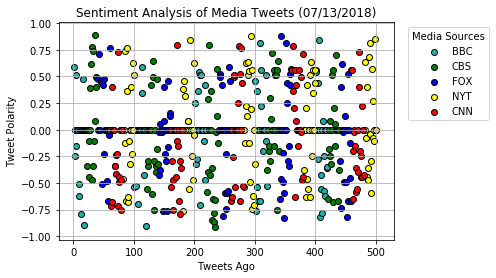

In [40]:
#SCATTER PLOTS

bbc_scatter = plt.scatter(BBC_df["Tweets Ago"], BBC_df["Compound"], marker="o", facecolors="lightseagreen", 
                          edgecolors="black", label = "BBC")
cbs_scatter = plt.scatter(CBS_df["Tweets Ago"], CBS_df["Compound"], marker="o", facecolors="green", 
                          edgecolors="black", label = "CBS")
fox_scatter = plt.scatter(FOX_df["Tweets Ago"], FOX_df["Compound"], marker="o", facecolors="blue", 
                          edgecolors="black", label="FOX")
nyt_scatter = plt.scatter(NYT_df["Tweets Ago"], NYT_df["Compound"], marker="o", facecolors="yellow",
                         edgecolors="black",label="NYT")
cnn_scatter = plt.scatter(CNN_df["Tweets Ago"], CNN_df["Compound"], marker="o", facecolors="red",
                         edgecolors="black", label="CNN")

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), title="Media Sources")
plt.title("Sentiment Analysis of Media Tweets (07/13/2018)")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid()
nyt_scatter
plt.savefig("Sentiment_Analysis_Scatter.png")

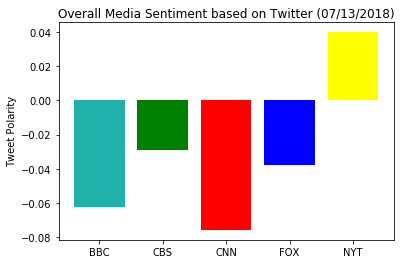

In [41]:
bbc_mean = np.mean(BBC_df["Compound"])
cbs_mean = np.mean(CBS_df["Compound"])
cnn_mean = np.mean(CNN_df["Compound"])
fox_mean = np.mean(FOX_df["Compound"])
nyt_mean = np.mean(NYT_df["Compound"])

means = [bbc_mean, cbs_mean, cnn_mean, fox_mean, nyt_mean]
users = ["BBC", "CBS", "CNN", "FOX", "NYT"]
colors = ["lightseagreen", "green", "red", "blue", "yellow"]

plt.title("Overall Media Sentiment based on Twitter (07/13/2018)")
plt.ylabel("Tweet Polarity")

plt.bar(users, means, color=colors, align="center")
plt.savefig("Overall_Media_Sentiment_Barchart.png")